# Data Preprocessing
For this first section, the goal is to import the various data sets and merge them to create a single flat data frame with the target variable and all independent variables in a single place

In [52]:
import pandas as pd
import numpy as np

### Health Table

In [53]:
#Import 2020 health data
health_df = pd.read_csv('../Base_Data_Preprocessed/2020_crude_health_measures.csv')

In [54]:
#Check structure
health_df.head()

,LocationID,ACCESS2,ARTHRITIS,BINGE,CANCER,CASTHMA,CERVICAL,CHD,CHECKUP,COLON_SCREEN,...,GHLTH,KIDNEY,LPA,MAMMOUSE,MHLTH,OBESITY,PHLTH,SLEEP,STROKE,TEETHLOST
0,59,15.3,24.2,15.5,6.5,9.2,82.8,6.4,74.7,72.4,...,14.5,3.0,23.5,78.2,13.5,31.9,10.0,32.7,3.2,13.4
1,1001,15.3,30.8,14.6,6.8,9.8,84.1,7.3,75.7,72.9,...,18.0,3.2,27.2,74.7,15.6,37.6,11.4,37.0,3.5,12.1
2,1003,14.1,33.8,14.7,8.2,9.1,85.1,8.0,76.3,74.2,...,16.8,3.3,24.7,75.2,14.7,32.9,11.2,33.9,3.5,9.5
3,1005,23.4,36.9,12.0,7.0,11.0,81.2,10.1,77.8,71.7,...,29.4,4.6,37.0,71.8,17.0,46.1,16.1,42.7,5.8,21.3
4,1007,19.2,32.7,14.4,6.8,9.9,81.8,8.3,75.1,71.9,...,22.9,3.5,32.5,71.0,16.8,38.6,13.5,39.5,4.2,16.1


### IRS Table

In [55]:
#Import 2020 IRS data
irs_df = pd.read_csv('../IRS_Data_Preprocessed/2020_tax_return_data.csv')

In [56]:
irs_df.head(100)

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,...,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000,ZIP_CODE,FIPS_CODE
0,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,630.0,1110.0,...,110.0,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0,35004.0,1115.0
1,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,620.0,1120.0,...,190.0,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0,35004.0,1115.0
2,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,460.0,750.0,...,230.0,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0,35004.0,1115.0
3,35004,4,630.0,140.0,420.0,60.0,590.0,0.0,310.0,430.0,...,180.0,386.0,450.0,1282.0,440.0,1276.0,0.0,0.0,35004.0,1115.0
4,35004,5,810.0,80.0,710.0,20.0,760.0,20.0,390.0,500.0,...,290.0,1124.0,530.0,1967.0,510.0,1925.0,20.0,139.0,35004.0,1115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,35019,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35019.0,1103.0
96,35020,1,5260.0,3040.0,260.0,1900.0,4730.0,200.0,3190.0,4280.0,...,420.0,318.0,4640.0,16196.0,4640.0,16194.0,0.0,0.0,35020.0,1073.0
97,35020,2,2960.0,1340.0,260.0,1290.0,2680.0,90.0,1670.0,2350.0,...,440.0,585.0,2520.0,8406.0,2520.0,8401.0,0.0,0.0,35020.0,1073.0
98,35020,3,860.0,420.0,170.0,230.0,760.0,50.0,510.0,570.0,...,240.0,611.0,620.0,1612.0,620.0,1603.0,0.0,0.0,35020.0,1073.0


In [57]:
#Confirm no duplicates
irs_df.drop_duplicates(inplace=True)

In [58]:
#Create a count field for later
irs_df['row_count'] = 1

In [59]:
irs_df.head()

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,...,A11901,N11900,A11900,N11902,A11902,N12000,A12000,ZIP_CODE,FIPS_CODE,row_count
0,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,630.0,1110.0,...,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0,35004.0,1115.0,1
1,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,620.0,1120.0,...,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0,35004.0,1115.0,1
2,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,460.0,750.0,...,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0,35004.0,1115.0,1
3,35004,4,630.0,140.0,420.0,60.0,590.0,0.0,310.0,430.0,...,386.0,450.0,1282.0,440.0,1276.0,0.0,0.0,35004.0,1115.0,1
4,35004,5,810.0,80.0,710.0,20.0,760.0,20.0,390.0,500.0,...,1124.0,530.0,1967.0,510.0,1925.0,20.0,139.0,35004.0,1115.0,1


The agi_level column provides 6 levels for each zip code.  Each agi_level is a different gross income amount.  The rest of the values in the files are sums at that level.  Because we have FIPS code for each ZIP code and are using FIPS as our target region, we can aggregate all of the measures at a FIPS level and then drop the ZIP code column.

In [60]:
#Aggregate the measures at  FIPS level
irs_sum_df = irs_df.groupby('FIPS_CODE').sum()
irs_sum_df.head(10)

,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,...,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000,ZIP_CODE,row_count
FIPS_CODE,,,,,,,,,,,,,,,,,,,,,
1001.0,2175096,210,36830.0,15640.0,13620.0,6650.0,34000.0,970.0,17320.0,27090.0,...,6730.0,24107.0,29210.0,92228.0,28910.0,89410.0,360.0,2053.0,2175096.0,60
1003.0,4823844,462,112650.0,49040.0,46090.0,14640.0,103310.0,2920.0,55070.0,74840.0,...,24900.0,149369.0,84100.0,289503.0,81540.0,250579.0,3330.0,37198.0,4823844.0,132
1005.0,1734978,168,11590.0,5500.0,3230.0,2610.0,10360.0,220.0,6940.0,7770.0,...,1710.0,6421.0,9370.0,30139.0,9280.0,29556.0,90.0,369.0,1734978.0,48
1007.0,2559480,252,34600.0,14600.0,13900.0,5250.0,31960.0,920.0,17760.0,24480.0,...,6940.0,25430.0,26870.0,82497.0,26490.0,78865.0,350.0,2240.0,2559480.0,72
1009.0,3390468,336,67680.0,28030.0,29140.0,9050.0,63570.0,1470.0,40090.0,49520.0,...,11850.0,60039.0,54110.0,170664.0,53330.0,161851.0,930.0,6838.0,3390468.0,96
1011.0,1739994,168,29680.0,14500.0,9810.0,4790.0,27250.0,790.0,15230.0,19730.0,...,6270.0,40546.0,22560.0,80671.0,21820.0,67728.0,900.0,12149.0,1739994.0,48
1013.0,1735050,168,11340.0,5000.0,3230.0,2940.0,10600.0,190.0,6260.0,8410.0,...,1750.0,5002.0,9270.0,31479.0,9120.0,30533.0,110.0,485.0,1735050.0,48
1015.0,3035382,294,59380.0,26750.0,20890.0,10400.0,55490.0,1200.0,32010.0,44280.0,...,9420.0,35173.0,48590.0,150344.0,48020.0,144194.0,660.0,5229.0,3035382.0,84
1017.0,2204196,210,34730.0,16310.0,10150.0,7670.0,32360.0,870.0,21630.0,24910.0,...,6030.0,24784.0,27780.0,90576.0,27410.0,84609.0,440.0,3840.0,2204196.0,60


In [61]:
# Drop the four working columns
irs_sum_df.drop(['zipcode', 'agi_stub', 'ZIP_CODE', 'row_count'], axis=1, inplace=True)

In [62]:
irs_sum_df.head()

,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,VRTCRIND,N2,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
FIPS_CODE,,,,,,,,,,,,,,,,,,,,,
1001.0,36830.0,15640.0,13620.0,6650.0,34000.0,970.0,17320.0,27090.0,280.0,72830.0,...,300.0,512.0,6730.0,24107.0,29210.0,92228.0,28910.0,89410.0,360.0,2053.0
1003.0,112650.0,49040.0,46090.0,14640.0,103310.0,2920.0,55070.0,74840.0,1110.0,214990.0,...,2810.0,8682.0,24900.0,149369.0,84100.0,289503.0,81540.0,250579.0,3330.0,37198.0
1005.0,11590.0,5500.0,3230.0,2610.0,10360.0,220.0,6940.0,7770.0,30.0,21590.0,...,80.0,180.0,1710.0,6421.0,9370.0,30139.0,9280.0,29556.0,90.0,369.0
1007.0,34600.0,14600.0,13900.0,5250.0,31960.0,920.0,17760.0,24480.0,230.0,69430.0,...,310.0,530.0,6940.0,25430.0,26870.0,82497.0,26490.0,78865.0,350.0,2240.0
1009.0,67680.0,28030.0,29140.0,9050.0,63570.0,1470.0,40090.0,49520.0,480.0,136210.0,...,660.0,1532.0,11850.0,60039.0,54110.0,170664.0,53330.0,161851.0,930.0,6838.0


In [63]:
#Make index column a column in the DF
irs_sum_df.reset_index(inplace=True)

In [64]:
irs_sum_df.head()

,FIPS_CODE,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,VRTCRIND,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1001.0,36830.0,15640.0,13620.0,6650.0,34000.0,970.0,17320.0,27090.0,280.0,...,300.0,512.0,6730.0,24107.0,29210.0,92228.0,28910.0,89410.0,360.0,2053.0
1,1003.0,112650.0,49040.0,46090.0,14640.0,103310.0,2920.0,55070.0,74840.0,1110.0,...,2810.0,8682.0,24900.0,149369.0,84100.0,289503.0,81540.0,250579.0,3330.0,37198.0
2,1005.0,11590.0,5500.0,3230.0,2610.0,10360.0,220.0,6940.0,7770.0,30.0,...,80.0,180.0,1710.0,6421.0,9370.0,30139.0,9280.0,29556.0,90.0,369.0
3,1007.0,34600.0,14600.0,13900.0,5250.0,31960.0,920.0,17760.0,24480.0,230.0,...,310.0,530.0,6940.0,25430.0,26870.0,82497.0,26490.0,78865.0,350.0,2240.0
4,1009.0,67680.0,28030.0,29140.0,9050.0,63570.0,1470.0,40090.0,49520.0,480.0,...,660.0,1532.0,11850.0,60039.0,54110.0,170664.0,53330.0,161851.0,930.0,6838.0


### Transportation Data

In [65]:
tp_df = pd.read_csv('County_Transportation_Profiles_V2.csv')

In [66]:
tp_df.head()

,County FIPS,County Name,State FIPS,State Name,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents
0,1001,Autauga County,1,Alabama,869.0,510.0,15576,15417,8710,24300,55050
1,1003,Baldwin County,1,Alabama,5384.0,4380.0,24011,17748,62235,86310,199510
2,1005,Barbour County,1,Alabama,455.0,110.0,2368,1871,6395,8785,26615
3,1007,Bibb County,1,Alabama,284.0,100.0,4868,4816,3410,8280,22570
4,1009,Blount County,1,Alabama,698.0,480.0,14171,13981,7205,21350,57705


There are several null values in the data file, looking at the raw file it appears these values likely should be zeroes.  We will set all null values to zero.

In [67]:
tp_df.fillna(0, inplace=True)
tp_df.head()

,County FIPS,County Name,State FIPS,State Name,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents
0,1001,Autauga County,1,Alabama,869.0,510.0,15576,15417,8710,24300,55050
1,1003,Baldwin County,1,Alabama,5384.0,4380.0,24011,17748,62235,86310,199510
2,1005,Barbour County,1,Alabama,455.0,110.0,2368,1871,6395,8785,26615
3,1007,Bibb County,1,Alabama,284.0,100.0,4868,4816,3410,8280,22570
4,1009,Blount County,1,Alabama,698.0,480.0,14171,13981,7205,21350,57705


We don't need county name, state fips, or state name.  We will drop them.

In [68]:
# Drop the columns
tp_df.drop(['County Name', 'State FIPS', 'State Name'], axis=1, inplace=True)

In [69]:
tp_df.head()

,County FIPS,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents
0,1001,869.0,510.0,15576,15417,8710,24300,55050
1,1003,5384.0,4380.0,24011,17748,62235,86310,199510
2,1005,455.0,110.0,2368,1871,6395,8785,26615
3,1007,284.0,100.0,4868,4816,3410,8280,22570
4,1009,698.0,480.0,14171,13981,7205,21350,57705


### Employment Data

In [70]:
emp_df = pd.read_csv('Employment_measures.csv')

C:\Users\Christopher\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [71]:
emp_df.head()

,area_fips,industry_code,total_annual_wages
0,1000,10,99675713076
1,1000,10,4820416591
2,1000,102,4820416591
3,1000,1021,776481288
4,1000,1022,336788


In [72]:
emp_f_df = emp_df.pivot_table('total_annual_wages', index = 'area_fips', columns = 'industry_code', aggfunc=np.sum)

In [73]:
emp_f_df.head()

industry_code,10,101,1011,1012,1013,102,1021,1022,1023,1024,...,9281,92811,928110,92812,928120,99,999,9999,99999,999999
area_fips,,,,,,,,,,,,,,,,,,,,,
1000,2.194300e+11,2.216613e+10,1.062685e+09,5.499454e+09,1.559972e+10,7.750959e+10,1.848698e+10,1.363653e+09,7.291026e+09,1.529848e+10,...,2.137699e+09,2.135993e+09,2.135993e+09,1705733.0,1705733.0,NaN,NaN,NaN,NaN,NaN
1001,9.314901e+08,1.312659e+08,1.136343e+07,2.452959e+07,9.537288e+07,3.344791e+08,9.963243e+07,1.555070e+06,2.107628e+07,3.550240e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,6.047675e+09,4.745605e+08,3.342715e+07,2.391190e+08,2.020144e+08,2.549277e+09,7.147777e+08,2.285446e+07,2.298550e+08,2.827624e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,6.444121e+08,1.331861e+08,1.407180e+07,8.256078e+06,1.108582e+08,1.890199e+08,5.611672e+07,6.300170e+05,1.023182e+07,1.440193e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,4.278573e+08,8.197796e+07,2.933131e+06,5.123299e+07,2.781184e+07,1.319507e+08,4.256828e+07,0.000000e+00,3.740444e+06,7.729769e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
emp_f_df.fillna(0, inplace=True)
emp_f_df.head()

industry_code,10,101,1011,1012,1013,102,1021,1022,1023,1024,...,9281,92811,928110,92812,928120,99,999,9999,99999,999999
area_fips,,,,,,,,,,,,,,,,,,,,,
1000,2.194300e+11,2.216613e+10,1.062685e+09,5.499454e+09,1.559972e+10,7.750959e+10,1.848698e+10,1.363653e+09,7.291026e+09,1.529848e+10,...,2.137699e+09,2.135993e+09,2.135993e+09,1705733.0,1705733.0,0.0,0.0,0.0,0.0,0.0
1001,9.314901e+08,1.312659e+08,1.136343e+07,2.452959e+07,9.537288e+07,3.344791e+08,9.963243e+07,1.555070e+06,2.107628e+07,3.550240e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,6.047675e+09,4.745605e+08,3.342715e+07,2.391190e+08,2.020144e+08,2.549277e+09,7.147777e+08,2.285446e+07,2.298550e+08,2.827624e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,6.444121e+08,1.331861e+08,1.407180e+07,8.256078e+06,1.108582e+08,1.890199e+08,5.611672e+07,6.300170e+05,1.023182e+07,1.440193e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,4.278573e+08,8.197796e+07,2.933131e+06,5.123299e+07,2.781184e+07,1.319507e+08,4.256828e+07,0.000000e+00,3.740444e+06,7.729769e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#Make index column a column in the DF
emp_f_df.reset_index(inplace=True)

In [76]:
emp_f_df.head()

industry_code,area_fips,10,101,1011,1012,1013,102,1021,1022,1023,...,9281,92811,928110,92812,928120,99,999,9999,99999,999999
0,1000,2.194300e+11,2.216613e+10,1.062685e+09,5.499454e+09,1.559972e+10,7.750959e+10,1.848698e+10,1.363653e+09,7.291026e+09,...,2.137699e+09,2.135993e+09,2.135993e+09,1705733.0,1705733.0,0.0,0.0,0.0,0.0,0.0
1,1001,9.314901e+08,1.312659e+08,1.136343e+07,2.452959e+07,9.537288e+07,3.344791e+08,9.963243e+07,1.555070e+06,2.107628e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,6.047675e+09,4.745605e+08,3.342715e+07,2.391190e+08,2.020144e+08,2.549277e+09,7.147777e+08,2.285446e+07,2.298550e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1005,6.444121e+08,1.331861e+08,1.407180e+07,8.256078e+06,1.108582e+08,1.890199e+08,5.611672e+07,6.300170e+05,1.023182e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1007,4.278573e+08,8.197796e+07,2.933131e+06,5.123299e+07,2.781184e+07,1.319507e+08,4.256828e+07,0.000000e+00,3.740444e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Merge Dataframes
In this section we will join the data frames on FIPS, check to see if there are any county codes without data (and drop accordingly), and then move the target variable to second column.

In [77]:
#Merge health and tax data
start_df = health_df[['LocationID', 'DEPRESSION', 'SLEEP', 'CHECKUP', 'CSMOKING', 'ACCESS2', 'LPA', 'DENTAL', 'COREM', 
                      'BINGE']].copy()
start_2_df = irs_sum_df[['FIPS_CODE', 'ELF', 'CPREP', 'MARS2', 'DIR_DEP', 'VITA_EIC', 'ELDERLY', 'A00100', 'N00300', 'N01000', 
                         'SCHF', 'N02300', 'N03210', 'N17000', 'A18300', 'N19300', 'A19700', 'A04800', 'N07180', 
                         'N07240', 'N09400', 'A11070', 'N11450', ]].copy()
step_1 = pd.merge(start_df, start_2_df, how='left', left_on='LocationID', right_on='FIPS_CODE')
step_1.drop(['FIPS_CODE'], axis=1,inplace=True)
step_1.head()

,LocationID,DEPRESSION,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,...,N17000,A18300,N19300,A19700,A04800,N07180,N07240,N09400,A11070,N11450
0,59,18.4,32.7,74.7,14.3,15.3,23.5,64.8,43.7,15.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,24.5,37.0,75.7,18.0,15.3,27.2,63.2,43.5,14.6,...,490.0,10381.0,1470.0,23331.0,1452141.0,1720.0,2530.0,3940.0,10254.0,200.0
2,1003,24.6,33.9,76.3,16.1,14.1,24.7,66.3,55.7,14.7,...,2690.0,56313.0,6700.0,95000.0,5730464.0,4220.0,6070.0,15870.0,24255.0,720.0
3,1005,23.7,42.7,77.8,24.8,23.4,37.0,48.2,36.8,12.0,...,100.0,1951.0,210.0,3212.0,324724.0,260.0,730.0,1250.0,3959.0,130.0
4,1007,24.8,39.5,75.1,22.4,19.2,32.5,53.7,40.5,14.4,...,640.0,15763.0,1960.0,26380.0,1479592.0,1710.0,2220.0,4240.0,8441.0,150.0


In [78]:
#Merge placeholder df with transportation
step_2 = pd.merge(step_1, tp_df, how='left', left_on='LocationID', right_on='County FIPS')
step_2.drop(['County FIPS'], axis=1,inplace=True)
step_2.head()

,LocationID,DEPRESSION,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,...,N09400,A11070,N11450,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents
0,59,18.4,32.7,74.7,14.3,15.3,23.5,64.8,43.7,15.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,24.5,37.0,75.7,18.0,15.3,27.2,63.2,43.5,14.6,...,3940.0,10254.0,200.0,869.0,510.0,15576.0,15417.0,8710.0,24300.0,55050.0
2,1003,24.6,33.9,76.3,16.1,14.1,24.7,66.3,55.7,14.7,...,15870.0,24255.0,720.0,5384.0,4380.0,24011.0,17748.0,62235.0,86310.0,199510.0
3,1005,23.7,42.7,77.8,24.8,23.4,37.0,48.2,36.8,12.0,...,1250.0,3959.0,130.0,455.0,110.0,2368.0,1871.0,6395.0,8785.0,26615.0
4,1007,24.8,39.5,75.1,22.4,19.2,32.5,53.7,40.5,14.4,...,4240.0,8441.0,150.0,284.0,100.0,4868.0,4816.0,3410.0,8280.0,22570.0


In [79]:
#Merge placeholder df with employment data
start_3_df = emp_f_df[['area_fips', '101', '102']].copy()
base_df = pd.merge(step_2, start_3_df, how='left', left_on='LocationID', right_on='area_fips')
base_df.drop(['area_fips'], axis=1,inplace=True)
base_df.head()

,LocationID,DEPRESSION,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,...,N11450,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,101,102
0,59,18.4,32.7,74.7,14.3,15.3,23.5,64.8,43.7,15.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,24.5,37.0,75.7,18.0,15.3,27.2,63.2,43.5,14.6,...,200.0,869.0,510.0,15576.0,15417.0,8710.0,24300.0,55050.0,131265906.0,3.344791e+08
2,1003,24.6,33.9,76.3,16.1,14.1,24.7,66.3,55.7,14.7,...,720.0,5384.0,4380.0,24011.0,17748.0,62235.0,86310.0,199510.0,474560534.0,2.549277e+09
3,1005,23.7,42.7,77.8,24.8,23.4,37.0,48.2,36.8,12.0,...,130.0,455.0,110.0,2368.0,1871.0,6395.0,8785.0,26615.0,133186092.0,1.890199e+08
4,1007,24.8,39.5,75.1,22.4,19.2,32.5,53.7,40.5,14.4,...,150.0,284.0,100.0,4868.0,4816.0,3410.0,8280.0,22570.0,81977964.0,1.319507e+08


In [80]:
#Look at remaining columns to confirm all the remaining columns are raw data and not labels
for col in base_df.columns:
    print(col)

LocationID
DEPRESSION
SLEEP
CHECKUP
CSMOKING
ACCESS2
LPA
DENTAL
COREM
BINGE
ELF
CPREP
MARS2
DIR_DEP
VITA_EIC
ELDERLY
A00100
N00300
N01000
SCHF
N02300
N03210
N17000
A18300
N19300
A19700
A04800
N07180
N07240
N09400
A11070
N11450
Number of business establishments
Number of resident workers who work at home
Number of workers from other counties who commute to work in the county
Number of resident workers who commute to work in other counties
Number of resident workers who commute within county
Number of resident workers
Number of residents
101
102


In [81]:
#Check for rows with null values
null_df = base_df[base_df.isna().any(axis=1)]
null_df

,LocationID,DEPRESSION,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,...,N11450,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,101,102
0,59,18.4,32.7,74.7,14.3,15.3,23.5,64.8,43.7,15.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2013,10.7,34.5,60.4,18.5,19.6,27.8,48.4,28.5,15.2,...,NaN,58.0,60.0,8.0,8.0,2455.0,2460.0,3300.0,109565947.0,20014990.0
69,2016,11.5,34.5,59.0,16.7,17.7,25.3,55.3,31.7,17.4,...,NaN,113.0,85.0,35.0,16.0,4085.0,4110.0,5715.0,109858661.0,108200371.0
72,2060,16.5,31.8,66.7,17.8,12.9,22.5,59.5,32.6,18.3,...,NaN,85.0,20.0,31.0,31.0,510.0,540.0,940.0,37954649.0,30578792.0
73,2063,15.6,30.1,61.4,15.0,11.8,18.6,64.4,36.7,19.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42372925.0,137123091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,56037,17.7,30.2,66.9,17.5,17.5,23.8,66.5,38.3,17.4,...,30.0,1248.0,400.0,740.0,469.0,21855.0,22595.0,44810.0,NaN,NaN
3140,56039,16.1,26.5,67.4,12.2,13.4,16.4,76.7,42.1,18.1,...,70.0,2140.0,790.0,775.0,360.0,13220.0,14010.0,22625.0,NaN,NaN
3141,56041,18.2,34.9,65.2,18.6,16.6,24.1,64.1,33.5,16.1,...,0.0,560.0,280.0,1632.0,1093.0,7685.0,9310.0,20895.0,NaN,NaN
3142,56043,17.0,29.8,68.5,16.7,17.2,24.6,64.9,40.9,14.7,...,0.0,346.0,185.0,339.0,300.0,3300.0,3640.0,8350.0,NaN,NaN


In [82]:
#Drop first row, it is an error
base_df.drop(index=base_df.index[0], axis=0, inplace=True)

In [83]:
#Remaining null appear to be based on employement data, will replace with 0 similar to what we did above
base_df.fillna(0, inplace=True)
base_df.head()

,LocationID,DEPRESSION,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,...,N11450,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,101,102
1,1001,24.5,37.0,75.7,18.0,15.3,27.2,63.2,43.5,14.6,...,200.0,869.0,510.0,15576.0,15417.0,8710.0,24300.0,55050.0,131265906.0,3.344791e+08
2,1003,24.6,33.9,76.3,16.1,14.1,24.7,66.3,55.7,14.7,...,720.0,5384.0,4380.0,24011.0,17748.0,62235.0,86310.0,199510.0,474560534.0,2.549277e+09
3,1005,23.7,42.7,77.8,24.8,23.4,37.0,48.2,36.8,12.0,...,130.0,455.0,110.0,2368.0,1871.0,6395.0,8785.0,26615.0,133186092.0,1.890199e+08
4,1007,24.8,39.5,75.1,22.4,19.2,32.5,53.7,40.5,14.4,...,150.0,284.0,100.0,4868.0,4816.0,3410.0,8280.0,22570.0,81977964.0,1.319507e+08
5,1009,26.7,36.4,75.3,21.0,17.8,29.8,59.0,40.6,14.2,...,350.0,698.0,480.0,14171.0,13981.0,7205.0,21350.0,57705.0,83578904.0,2.351396e+08


In [84]:
#Move target variable to first column
first_column = base_df.pop('DEPRESSION')
base_df.insert(0, 'DEPRESSION', first_column)
final_df = base_df.copy()
final_df.head()

,DEPRESSION,LocationID,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,...,N11450,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,101,102
1,24.5,1001,37.0,75.7,18.0,15.3,27.2,63.2,43.5,14.6,...,200.0,869.0,510.0,15576.0,15417.0,8710.0,24300.0,55050.0,131265906.0,3.344791e+08
2,24.6,1003,33.9,76.3,16.1,14.1,24.7,66.3,55.7,14.7,...,720.0,5384.0,4380.0,24011.0,17748.0,62235.0,86310.0,199510.0,474560534.0,2.549277e+09
3,23.7,1005,42.7,77.8,24.8,23.4,37.0,48.2,36.8,12.0,...,130.0,455.0,110.0,2368.0,1871.0,6395.0,8785.0,26615.0,133186092.0,1.890199e+08
4,24.8,1007,39.5,75.1,22.4,19.2,32.5,53.7,40.5,14.4,...,150.0,284.0,100.0,4868.0,4816.0,3410.0,8280.0,22570.0,81977964.0,1.319507e+08
5,26.7,1009,36.4,75.3,21.0,17.8,29.8,59.0,40.6,14.2,...,350.0,698.0,480.0,14171.0,13981.0,7205.0,21350.0,57705.0,83578904.0,2.351396e+08


# Machine Learning

## Standard and Regularized Regression

### Preparing Data for Regression: Multicolinearity

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
#Check for multicolinearity
temp_df = base_df.copy()
temp_df.drop(['DEPRESSION', 'LocationID'], axis=1,inplace=True)

In [87]:
temp_df.head()

,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,ELF,CPREP,...,N11450,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,101,102
1,37.0,75.7,18.0,15.3,27.2,63.2,43.5,14.6,34000.0,970.0,...,200.0,869.0,510.0,15576.0,15417.0,8710.0,24300.0,55050.0,131265906.0,3.344791e+08
2,33.9,76.3,16.1,14.1,24.7,66.3,55.7,14.7,103310.0,2920.0,...,720.0,5384.0,4380.0,24011.0,17748.0,62235.0,86310.0,199510.0,474560534.0,2.549277e+09
3,42.7,77.8,24.8,23.4,37.0,48.2,36.8,12.0,10360.0,220.0,...,130.0,455.0,110.0,2368.0,1871.0,6395.0,8785.0,26615.0,133186092.0,1.890199e+08
4,39.5,75.1,22.4,19.2,32.5,53.7,40.5,14.4,31960.0,920.0,...,150.0,284.0,100.0,4868.0,4816.0,3410.0,8280.0,22570.0,81977964.0,1.319507e+08
5,36.4,75.3,21.0,17.8,29.8,59.0,40.6,14.2,63570.0,1470.0,...,350.0,698.0,480.0,14171.0,13981.0,7205.0,21350.0,57705.0,83578904.0,2.351396e+08


In [88]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = temp_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(temp_df.values, i)
                          for i in range(len(temp_df.columns))]

In [89]:
vif_data.round(2)

,feature,VIF
0,SLEEP,227.79
1,CHECKUP,923.79
2,CSMOKING,110.76
3,ACCESS2,15.49
4,LPA,221.88
5,DENTAL,343.99
6,COREM,128.99
7,BINGE,59.11
8,ELF,6790.76
9,CPREP,67.42


In [90]:
temp_df.drop(['ELF', 'CHECKUP', 'A00100', 'A04800', 'Number of workers from other counties who commute to work in the county',
              'Number of resident workers'], axis=1, inplace=True)

In [91]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = temp_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(temp_df.values, i)
                          for i in range(len(temp_df.columns))]

In [92]:
vif_data.round(2)

,feature,VIF
0,SLEEP,196.49
1,CSMOKING,108.27
2,ACCESS2,15.31
3,LPA,146.80
4,DENTAL,165.33
5,COREM,111.39
6,BINGE,55.51
7,CPREP,46.85
8,MARS2,192.34
9,DIR_DEP,818.97


In [93]:
temp_df.drop(['Number of residents', 'DIR_DEP', 'SLEEP', 'A18300', 'N19300'], axis=1, inplace=True)

In [94]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = temp_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(temp_df.values, i)
                          for i in range(len(temp_df.columns))]

In [95]:
vif_data.round(2)

,feature,VIF
0,CSMOKING,93.35
1,ACCESS2,14.16
2,LPA,126.32
3,DENTAL,145.35
4,COREM,109.31
5,BINGE,54.51
6,CPREP,44.14
7,MARS2,178.53
8,VITA_EIC,3.93
9,ELDERLY,117.92


In [96]:
temp_df.describe()

,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,CPREP,MARS2,VITA_EIC,ELDERLY,...,N07240,N09400,A11070,N11450,Number of business establishments,Number of resident workers who work at home,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,101,102
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3.143000e+03,3143.000000,3.143000e+03,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3.143000e+03,3.143000e+03,3.143000e+03
mean,18.920617,16.141839,27.017754,59.699682,42.352498,15.725326,1940.232262,2.415395e+04,75.828826,1.722995e+04,...,4166.862870,8516.083360,14173.633471,350.022272,2491.897868,2119.565383,11071.114540,3.359670e+04,4.524625e+08,2.132316e+09
std,3.969012,6.552451,5.318558,7.520827,5.143610,2.706096,6628.400921,5.568443e+04,298.669134,3.915918e+04,...,9470.219332,26184.479686,37120.670403,1798.646328,8722.761201,7666.521109,30430.502444,1.291397e+05,1.782488e+09,1.095720e+10
min,5.200000,5.500000,11.800000,33.600000,19.200000,8.200000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,16.300000,11.500000,23.400000,54.300000,39.000000,13.800000,180.000000,3.935000e+03,0.000000,2.865000e+03,...,700.000000,1225.000000,2448.500000,0.000000,218.000000,175.000000,1095.000000,2.540000e+03,2.360488e+07,6.109644e+07
50%,18.600000,14.400000,26.600000,60.600000,42.300000,15.500000,500.000000,9.020000e+03,0.000000,6.520000e+03,...,1680.000000,2700.000000,5670.000000,40.000000,544.000000,405.000000,2802.000000,6.455000e+03,8.620251e+07,1.860706e+08
75%,21.400000,18.800000,30.600000,65.400000,45.600000,17.400000,1340.000000,2.140000e+04,50.000000,1.527500e+04,...,3980.000000,6190.000000,12442.000000,170.000000,1504.500000,1175.000000,7832.500000,1.884500e+04,2.744575e+08,7.022874e+08
max,41.100000,53.400000,47.800000,80.600000,60.900000,25.600000,211040.000000,1.431250e+06,6870.000000,1.021370e+06,...,240170.000000,823790.000000,959251.000000,55640.000000,275316.000000,239520.000000,609108.000000,4.248855e+06,4.898146e+10,3.142992e+11


In [97]:
reg_df = base_df.copy()
reg_df.drop(['ELF', 'CHECKUP', 'A00100', 'A04800', 'Number of workers from other counties who commute to work in the county',
              'Number of resident workers', 'Number of residents', 'DIR_DEP', 'SLEEP', 'A18300', 'N19300'], axis=1,
           inplace=True)

In [98]:
reg_df.head()

,DEPRESSION,LocationID,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,CPREP,MARS2,...,N07240,N09400,A11070,N11450,Number of business establishments,Number of resident workers who work at home,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,101,102
1,24.5,1001,18.0,15.3,27.2,63.2,43.5,14.6,970.0,13620.0,...,2530.0,3940.0,10254.0,200.0,869.0,510.0,15417.0,8710.0,131265906.0,3.344791e+08
2,24.6,1003,16.1,14.1,24.7,66.3,55.7,14.7,2920.0,46090.0,...,6070.0,15870.0,24255.0,720.0,5384.0,4380.0,17748.0,62235.0,474560534.0,2.549277e+09
3,23.7,1005,24.8,23.4,37.0,48.2,36.8,12.0,220.0,3230.0,...,730.0,1250.0,3959.0,130.0,455.0,110.0,1871.0,6395.0,133186092.0,1.890199e+08
4,24.8,1007,22.4,19.2,32.5,53.7,40.5,14.4,920.0,13900.0,...,2220.0,4240.0,8441.0,150.0,284.0,100.0,4816.0,3410.0,81977964.0,1.319507e+08
5,26.7,1009,21.0,17.8,29.8,59.0,40.6,14.2,1470.0,29140.0,...,5200.0,8760.0,19588.0,350.0,698.0,480.0,13981.0,7205.0,83578904.0,2.351396e+08


In [99]:
reg_df.drop(columns=['LocationID'], axis=1, inplace=True)

### Split the Data Into Train and Test ahead of Scaling

In [100]:
#Import the appropriate library
from sklearn.model_selection import train_test_split, cross_val_score

# split dataset into testing and training
#Got an error using ix and changed it to iloc
features_train, features_test, target_train, target_test = train_test_split(
    reg_df.iloc[:,1:].values, reg_df.iloc[:,0].values, test_size=0.30, random_state=0)

### Normalizing the Split Data (Fit Transform Train and Transform Test)

In [101]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
normalized_train_X = normalizer.fit_transform(features_train)
normalized_test_X = normalizer.transform(features_test)

In [102]:
a = pd.DataFrame(target_train, columns=['Value'])
b = pd.DataFrame(target_test, columns=['Value'])

a['Scaled'] = (a['Value'] - a['Value'].mean()) / a['Value'].std()
b['Scaled'] = (b['Value'] - b['Value'].mean()) / b['Value'].std()

In [103]:
features_train = normalized_train_X
features_test = normalized_test_X
target_train = a[['Scaled']]
target_test = b[['Scaled']]

## Ordinary Least Squares Linear Regression

In [104]:
#Import the appropriate library for linear regression and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error

#Fit a linear regression model to the training data
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)

#Run both the training and test feature data through the linear regression to predict the training and test targets, respectively
target_train_predict = model_LR.predict(features_train)
target_test_predict = model_LR.predict(features_test)

#Print coefficients and intercept
print('Coefficients: ', model_LR.coef_)
print('Y-Intercept: ', model_LR.intercept_)

#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

Coefficients:  [[ 1.75803782e+03 -7.00710502e+02 -7.30314424e+02  1.63893165e+02
   3.36896869e+01 -9.76683563e+02 -1.28498444e+00 -8.99780683e-01
   5.90321484e+01 -1.03779257e+00  4.09930667e+00 -2.47296815e+00
   9.76625894e-01  6.80117855e+00  5.30830551e+00 -5.11385252e+00
   6.92934055e-01 -9.42502583e+00 -4.47551523e+00  2.01180213e+00
  -1.29597108e+00 -1.33085710e+02 -2.04447633e+00 -2.08176677e+00
   5.09148284e-01  1.12112918e+00  1.64283926e+00  1.85880660e+00]]
Y-Intercept:  [-2.25829281]
MSE train:0.956,test:0.954
R^2 train:0.043,test:0.045
Mean abs. error train:0.782,test:0.780
Explained variance score train:0.043,test:0.045
Median absolute error train:0.670,test:0.645


## Ridge Regression

In [105]:
#Import the appropriate library for Ridge regression and metrics
from sklearn.linear_model import Ridge

#Fit a Ridge regression model to the training data
model_RD = Ridge(alpha = 5)
model_RD.fit(features_train, target_train)

#Run both the training and test feature data through the Ridge regression to predict the training and test targets, respectively
target_train_predict = model_RD.predict(features_train)
target_test_predict = model_RD.predict(features_test)

#Print coefficients and intercept
print('Coefficients: ', model_RD.coef_)
print('Y-Intercept: ', model_RD.intercept_)

#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

Coefficients:  [[-3.59541086e-02 -3.29076136e-02 -6.03331899e-02 -2.85137988e-01
  -1.11067154e-01 -4.85594119e-02  6.91388362e-03  2.21406902e-01
   1.03732019e-03  1.67196767e-01  2.84170480e-01  9.44358233e-02
   7.68938892e-03  1.87884018e-01  8.22134544e-02  5.91234358e-03
   2.78287032e-02  1.99103046e-02  8.12679977e-02  3.04724919e-02
   7.45163502e-02  6.99270476e-04 -7.17132285e-03 -1.28240566e-02
   8.60530303e-02 -1.41180113e-01  9.22004042e-01  6.55076294e-01]]
Y-Intercept:  [-0.91256125]
MSE train:0.964,test:0.957
R^2 train:0.035,test:0.042
Mean abs. error train:0.791,test:0.783
Explained variance score train:0.035,test:0.042
Median absolute error train:0.678,test:0.652


In [106]:
#Import the Grid Search functionality
from sklearn.model_selection import GridSearchCV

#Define how I want the grid search to proceed
param_grid={"alpha": [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 20, 30, 50]}

#Use the grid search functionality to test each alpha and use 5 iterations of cross-validation to get average results
grid_search = GridSearchCV(model_RD, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(features_train, target_train)

#Show the best alpha
print("Best", grid_search.best_params_) 

Best {'alpha': 0.01}


In [130]:
#Fit a Ridge regression model to the training data
model_RD = Ridge(alpha = 0.01)
model_RD.fit(features_train, target_train)

#Run both the training and test feature data through the Ridge regression to predict the training and test targets, respectively
target_train_predict = model_RD.predict(features_train)
target_test_predict = model_RD.predict(features_test)

#Print coefficients and intercept
print('Coefficients: ', model_RD.coef_)
print('Y-Intercept: ', model_RD.intercept_)

#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

Coefficients:  [ 2.85584519e-01  5.24412516e-03 -1.79399285e-01 -1.71943143e-01
 -3.19615707e-01  9.56924664e-02 -1.63484752e-01  1.61010688e-05
 -1.23085909e-04  6.37225266e-05 -1.49716661e-05 -5.52337284e-05
  1.39126800e-05 -1.04445034e-06 -8.55834691e-06 -6.57231446e-05
  6.73312129e-04 -2.82599464e-06  3.34517282e-05 -3.46440149e-04
  9.70661825e-07 -2.39173634e-05  2.18814906e-06  1.09627016e-06
 -3.02167518e-04  7.94937685e-05  1.61454089e-04 -2.28913588e-05
 -4.34110264e-04  1.56374858e-04 -9.92252982e-05 -1.54784085e-03
  6.86860571e-06 -1.54610806e-03  1.55681878e-03 -5.31096671e-06
  4.50746470e-11 -2.98300471e-11]
Y-Intercept:  35.563947327802246
MSE train:4.885,test:6.273
R^2 train:0.513,test:0.350
Mean abs. error train:1.802,test:1.905
Explained variance score train:0.513,test:0.350
Median absolute error train:1.546,test:1.642


C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.11034e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## LASSO Regression

In [134]:
#Import the appropriate library for Lasso regression and metrics
from sklearn.linear_model import Lasso

#Fit a Lasso regression model to the training data
model_LS = Lasso(alpha = 1)
model_LS.fit(features_train, target_train)

#Run both the training and test feature data through the Lasso regression to predict the training and test targets, respectively
target_train_predict = model_LS.predict(features_train)
target_test_predict = model_LS.predict(features_test)

#Print coefficients and intercept
print('Coefficients: ', model_LS.coef_)
print('Y-Intercept: ', model_LS.intercept_)

#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

Coefficients:  [ 1.91192613e-01  0.00000000e+00 -9.73305026e-02  0.00000000e+00
 -1.80304950e-01  4.44888648e-02 -2.35751925e-02 -6.29341865e-06
 -2.26703896e-04  6.71864148e-05  1.47204189e-06  3.16826089e-06
  1.83781920e-05 -2.96611265e-07 -1.05414434e-05 -7.38667649e-05
  5.86362255e-04 -3.58448331e-06  4.33078404e-05 -3.33490072e-04
 -6.59467701e-07  1.24827525e-05  1.71282838e-06  3.10410574e-07
 -3.68087290e-04  1.23585737e-04  1.92333606e-04 -4.25184433e-05
 -4.03436238e-04  8.85113150e-05 -1.01312539e-04  3.05803445e-06
 -6.62917593e-07 -3.51182580e-06  6.14390271e-07  1.06266608e-06
  1.78986810e-10  4.13233707e-12]
Y-Intercept:  24.765538422725726
MSE train:5.373,test:6.598
R^2 train:0.464,test:0.316
Mean abs. error train:1.884,test:1.976
Explained variance score train:0.464,test:0.316
Median absolute error train:1.657,test:1.634


C:\Users\Christopher\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.097e+03, tolerance: 2.207e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Random Forest Regressor

In [135]:
from sklearn.ensemble import RandomForestRegressor

#Fit a Random Forest regression model to the training data
model_RFR = RandomForestRegressor(max_depth = 3, random_state = 1)
model_RFR.fit(features_train, target_train)

#Run both the training and test feature data through to predict the training and test targets, respectively
target_train_predict = model_RFR.predict(features_train)
target_test_predict = model_RFR.predict(features_test)


#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

MSE train:5.077,test:5.382
R^2 train:0.494,test:0.442
Mean abs. error train:1.790,test:1.838
Explained variance score train:0.494,test:0.444
Median absolute error train:1.511,test:1.455


In [136]:
#Define how I want the grid search to proceed
param_grid={"max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

#Use the grid search functionality to test each alpha and use 5 iterations of cross-validation to get average results
grid_search = GridSearchCV(model_RFR, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(features_train, target_train)

#Show the best alpha
print("Best", grid_search.best_params_) 

Best {'max_depth': 20}


In [137]:
#Fit a Random Forest regression model to the training data
model_RFR = RandomForestRegressor(max_depth = 20, random_state = 1)
model_RFR.fit(features_train, target_train)

#Run both the training and test feature data through to predict the training and test targets, respectively
target_train_predict = model_RFR.predict(features_train)
target_test_predict = model_RFR.predict(features_test)


#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

MSE train:0.428,test:3.149
R^2 train:0.957,test:0.674
Mean abs. error train:0.491,test:1.322
Explained variance score train:0.957,test:0.675
Median absolute error train:0.368,test:0.985


Based on these results, there are a few conclusions we can reach:
1. Linear regression R2 values were all extremely low (4%) while Random Forest Regression had much better comparative results (50%).  It implies the relationship is non-linear.
2. The Random Forest Regression was run on the data after it was pared down and transformed.  We can attempt to run the same model on the base data and see if the performance improves (implying some of the removed data has an impact on results).

# Random Forest Regression Part 2

In this section we rerun the random forest regression using the full data set with unscaled/untransformed data since decision trees can better handle them.

In [112]:
base_df.head()

,DEPRESSION,LocationID,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,...,N11450,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,101,102
1,24.5,1001,37.0,75.7,18.0,15.3,27.2,63.2,43.5,14.6,...,200.0,869.0,510.0,15576.0,15417.0,8710.0,24300.0,55050.0,131265906.0,3.344791e+08
2,24.6,1003,33.9,76.3,16.1,14.1,24.7,66.3,55.7,14.7,...,720.0,5384.0,4380.0,24011.0,17748.0,62235.0,86310.0,199510.0,474560534.0,2.549277e+09
3,23.7,1005,42.7,77.8,24.8,23.4,37.0,48.2,36.8,12.0,...,130.0,455.0,110.0,2368.0,1871.0,6395.0,8785.0,26615.0,133186092.0,1.890199e+08
4,24.8,1007,39.5,75.1,22.4,19.2,32.5,53.7,40.5,14.4,...,150.0,284.0,100.0,4868.0,4816.0,3410.0,8280.0,22570.0,81977964.0,1.319507e+08
5,26.7,1009,36.4,75.3,21.0,17.8,29.8,59.0,40.6,14.2,...,350.0,698.0,480.0,14171.0,13981.0,7205.0,21350.0,57705.0,83578904.0,2.351396e+08


In [113]:
base_df.drop(columns = 'LocationID', axis=1,inplace=True)

In [114]:
#Import the appropriate library
from sklearn.model_selection import train_test_split, cross_val_score

# split dataset into testing and training
#Got an error using ix and changed it to iloc
features_train, features_test, target_train, target_test = train_test_split(
    base_df.iloc[:,1:].values, base_df.iloc[:,0].values, test_size=0.30, random_state=0)

In [115]:
#Fit a Random Forest regression model to the training data
model_RFR = RandomForestRegressor(max_depth = 40, random_state = 1)
model_RFR.fit(features_train, target_train)

#Run both the training and test feature data through to predict the training and test targets, respectively
target_train_predict = model_RFR.predict(features_train)
target_test_predict = model_RFR.predict(features_test)


#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

MSE train:0.393,test:2.799
R^2 train:0.961,test:0.710
Mean abs. error train:0.461,test:1.218
Explained variance score train:0.961,test:0.711
Median absolute error train:0.331,test:0.828


In [116]:
#Define how I want the grid search to proceed
param_grid={"max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

#Use the grid search functionality to test each alpha and use 5 iterations of cross-validation to get average results
grid_search = GridSearchCV(model_RFR, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(features_train, target_train)

#Show the best alpha
print("Best", grid_search.best_params_)

Best {'max_depth': 30}


In [117]:
#Fit a Random Forest regression model to the training data
model_RFR = RandomForestRegressor(max_depth = 30, random_state = 1)
model_RFR.fit(features_train, target_train)

#Run both the training and test feature data through to predict the training and test targets, respectively
target_train_predict = model_RFR.predict(features_train)
target_test_predict = model_RFR.predict(features_test)


#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

MSE train:0.393,test:2.799
R^2 train:0.961,test:0.710
Mean abs. error train:0.461,test:1.218
Explained variance score train:0.961,test:0.711
Median absolute error train:0.331,test:0.828


array([[<AxesSubplot:title={'center':'DEPRESSION'}>]], dtype=object)

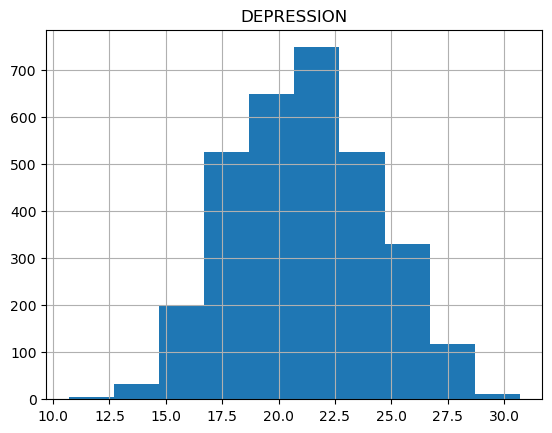

In [118]:
base_df.hist(column='DEPRESSION')

In [119]:
base_df.describe()

,DEPRESSION,SLEEP,CHECKUP,CSMOKING,ACCESS2,LPA,DENTAL,COREM,BINGE,ELF,...,N11450,Number of business establishments,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,101,102
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3.143000e+03,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3.143000e+03,3.143000e+03,3.143000e+03,3.143000e+03,3.143000e+03
mean,21.091473,33.354566,75.420363,18.920617,16.141839,27.017754,59.699682,42.352498,15.725326,6.359599e+04,...,350.022272,2491.897868,2119.565383,12783.176901,11071.114540,3.359670e+04,4.640683e+04,1.013518e+05,4.524625e+08,2.132316e+09
std,3.149710,3.696227,3.937165,3.969012,6.552451,5.318558,7.520827,5.143610,2.706096,1.634534e+05,...,1798.646328,8722.761201,7666.521109,33544.750150,30430.502444,1.291397e+05,1.513941e+05,3.251559e+05,1.782488e+09,1.095720e+10
min,10.700000,23.200000,59.000000,5.200000,5.500000,11.800000,33.600000,19.200000,8.200000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,18.800000,30.700000,73.100000,16.300000,11.500000,23.400000,54.300000,39.000000,13.800000,9.490000e+03,...,0.000000,218.000000,175.000000,1389.500000,1095.000000,2.540000e+03,4.415000e+03,1.099500e+04,2.360488e+07,6.109644e+07
50%,21.100000,33.300000,76.000000,18.600000,14.400000,26.600000,60.600000,42.300000,15.500000,2.190000e+04,...,40.000000,544.000000,405.000000,3490.000000,2802.000000,6.455000e+03,1.053000e+04,2.573000e+04,8.620251e+07,1.860706e+08
75%,23.300000,35.800000,78.100000,21.400000,18.800000,30.600000,65.400000,45.600000,17.400000,5.359500e+04,...,170.000000,1504.500000,1175.000000,9024.500000,7832.500000,1.884500e+04,2.888000e+04,6.755750e+04,2.744575e+08,7.022874e+08
max,30.700000,46.400000,84.600000,41.100000,53.400000,47.800000,80.600000,60.900000,25.600000,4.646800e+06,...,55640.000000,275316.000000,239520.000000,628360.000000,609108.000000,4.248855e+06,4.591360e+06,1.005716e+07,4.898146e+10,3.142992e+11


[Text(0.5196534737179456, 0.9791666666666666, 'X[2] <= 18.85\nsquared_error = 9.76\nsamples = 1390\nvalue = 20.911'),
 Text(0.26930174286292397, 0.9375, 'X[21] <= 2241.5\nsquared_error = 7.296\nsamples = 752\nvalue = 19.363'),
 Text(0.08992986379897185, 0.8958333333333334, 'X[6] <= 44.75\nsquared_error = 5.735\nsamples = 214\nvalue = 17.927'),
 Text(0.04047759930080939, 0.8541666666666666, 'X[32] <= 49.5\nsquared_error = 4.704\nsamples = 163\nvalue = 18.52'),
 Text(0.0034742390602183343, 0.8125, 'X[0] <= 31.8\nsquared_error = 4.718\nsamples = 6\nvalue = 14.556'),
 Text(0.0020845434361310006, 0.7708333333333334, 'X[21] <= 58.0\nsquared_error = 0.669\nsamples = 3\nvalue = 17.067'),
 Text(0.0013896956240873337, 0.7291666666666666, 'X[6] <= 36.6\nsquared_error = 0.04\nsamples = 2\nvalue = 16.5'),
 Text(0.0006948478120436669, 0.6875, 'squared_error = 0.0\nsamples = 1\nvalue = 16.3'),
 Text(0.0020845434361310006, 0.6875, 'squared_error = -0.0\nsamples = 1\nvalue = 16.7'),
 Text(0.00277939124

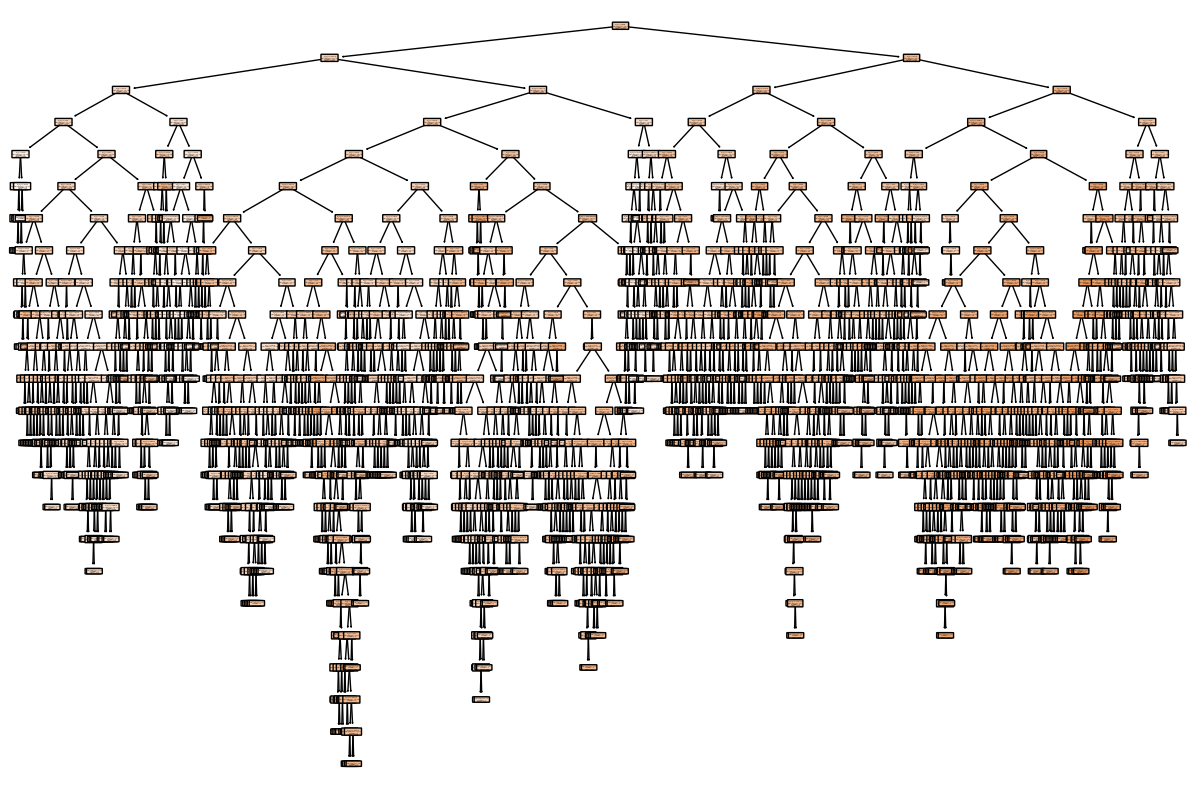

In [120]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(model_RFR.estimators_[0], 
          filled=True, impurity=True, 
          rounded=True)

[Text(0.5657469753026457, 0.9791666666666666, 'X[2] <= 19.95\nsquared_error = 10.194\nsamples = 1397\nvalue = 21.106'),
 Text(0.2679406198654426, 0.9375, 'X[9] <= 85.0\nsquared_error = 7.115\nsamples = 878\nvalue = 19.766'),
 Text(0.05156019477916784, 0.8958333333333334, 'X[2] <= 16.85\nsquared_error = 5.78\nsamples = 159\nvalue = 17.884'),
 Text(0.019153853369833107, 0.8541666666666666, 'X[7] <= 12.6\nsquared_error = 5.052\nsamples = 82\nvalue = 16.943'),
 Text(0.005685323054269251, 0.8125, 'X[17] <= 15.0\nsquared_error = 0.302\nsamples = 4\nvalue = 21.633'),
 Text(0.004229880352376323, 0.7708333333333334, 'X[7] <= 8.95\nsquared_error = 0.01\nsamples = 2\nvalue = 22.4'),
 Text(0.0035021590014298587, 0.7291666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 22.5'),
 Text(0.004957601703322787, 0.7291666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 22.3'),
 Text(0.007140765756162179, 0.7708333333333334, 'X[3] <= 11.7\nsquared_error = 0.008\nsamples = 2\nvalue = 21.25'),
 Tex

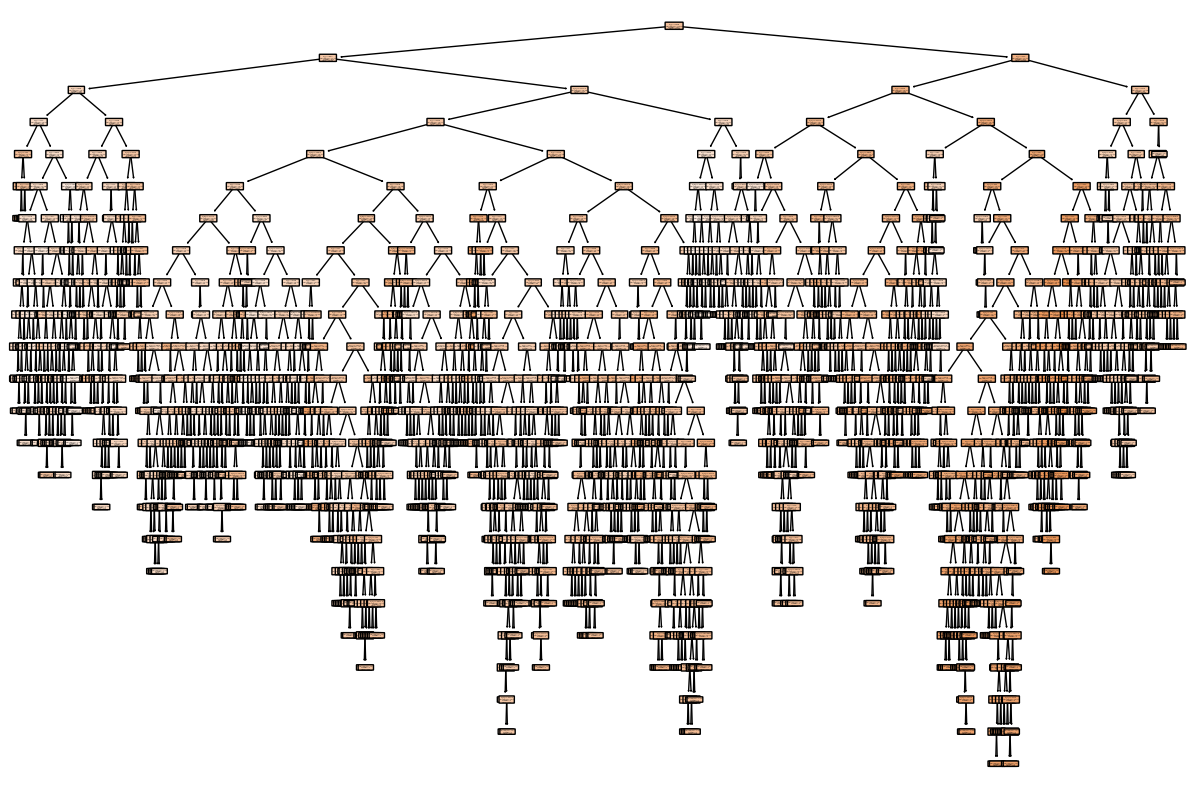

In [121]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(model_RFR.estimators_[27], 
          filled=True, impurity=True, 
          rounded=True)

In [122]:
X = model_RFR.feature_importances_
temp_df = base_df.copy()
temp_df.drop(columns = 'DEPRESSION', axis=1, inplace=True)
Y = temp_df.columns

results_df = pd.DataFrame({'Feature': Y, 'Importance': X})
results_df.sort_values(by=['Importance'], ascending=False,inplace=True)
results_df.head(30)

,Feature,Importance
2,CSMOKING,0.407014
3,ACCESS2,0.075198
7,BINGE,0.046053
5,DENTAL,0.039360
0,SLEEP,0.038162
1,CHECKUP,0.035962
4,LPA,0.030901
6,COREM,0.028962
17,SCHF,0.027892
9,CPREP,0.025097


In [123]:
results_df.Importance.sum()

0.9999999999999999

In [124]:
base_df_2 = base_df.copy()
base_df_2.drop(columns='CSMOKING', axis=1, inplace=True)

In [125]:
# split dataset into testing and training
#Got an error using ix and changed it to iloc
features_train, features_test, target_train, target_test = train_test_split(
    base_df_2.iloc[:,1:].values, base_df_2.iloc[:,0].values, test_size=0.30, random_state=0)

In [126]:
#Fit a Random Forest regression model to the training data
model_RFR_2 = RandomForestRegressor(max_depth = 40, random_state = 1)
model_RFR_2.fit(features_train, target_train)

#Run both the training and test feature data through to predict the training and test targets, respectively
target_train_predict = model_RFR_2.predict(features_train)
target_test_predict = model_RFR_2.predict(features_test)


#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

MSE train:0.431,test:3.141
R^2 train:0.957,test:0.674
Mean abs. error train:0.493,test:1.319
Explained variance score train:0.957,test:0.676
Median absolute error train:0.371,test:1.001


In [127]:
#Define how I want the grid search to proceed
param_grid={"max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

#Use the grid search functionality to test each alpha and use 5 iterations of cross-validation to get average results
grid_search = GridSearchCV(model_RFR_2, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(features_train, target_train)

#Show the best alpha
print("Best", grid_search.best_params_)

Best {'max_depth': 20}


In [128]:
#Fit a Random Forest regression model to the training data
model_RFR_2 = RandomForestRegressor(max_depth = 20, random_state = 1)
model_RFR_2.fit(features_train, target_train)

#Run both the training and test feature data through to predict the training and test targets, respectively
target_train_predict = model_RFR_2.predict(features_train)
target_test_predict = model_RFR_2.predict(features_test)


#Calculate the performance metrics for the model
print('MSE train:%.3f,test:%.3f'%(
    mean_squared_error(target_train, target_train_predict), 
    mean_squared_error(target_test, target_test_predict)))

print('R^2 train:%.3f,test:%.3f'%(
    r2_score(target_train, target_train_predict), 
    r2_score(target_test, target_test_predict)))

print('Mean abs. error train:%.3f,test:%.3f'%(
    mean_absolute_error(target_train, target_train_predict), 
    mean_absolute_error(target_test, target_test_predict)))

print('Explained variance score train:%.3f,test:%.3f'%(
    explained_variance_score(target_train, target_train_predict), 
    explained_variance_score(target_test, target_test_predict)))

print('Median absolute error train:%.3f,test:%.3f'%(
    median_absolute_error(target_train, target_train_predict), 
    median_absolute_error(target_test, target_test_predict)))

MSE train:0.428,test:3.149
R^2 train:0.957,test:0.674
Mean abs. error train:0.491,test:1.322
Explained variance score train:0.957,test:0.675
Median absolute error train:0.368,test:0.985


In [129]:
X = model_RFR_2.feature_importances_
temp_df_2 = base_df_2.copy()
temp_df_2.drop(columns = 'DEPRESSION', axis=1, inplace=True)
Y = temp_df_2.columns

results_df = pd.DataFrame({'Feature': Y, 'Importance': X})
results_df.sort_values(by=['Importance'], ascending=False,inplace=True)
results_df.head(30)

,Feature,Importance
0,SLEEP,0.225795
2,ACCESS2,0.107526
3,LPA,0.094821
4,DENTAL,0.093116
1,CHECKUP,0.052768
6,BINGE,0.046371
16,SCHF,0.045720
17,N02300,0.039023
19,N17000,0.036510
5,COREM,0.035173
